## Assignment 1 Machine Learning

This assignment will contain 2 questions with details as below. The due date is Feburary 28 (Sunday), 2020 23:59PM. Each late day will result in 20% loss of total points.

### Question 1  (20 points) Make a plan before running your model

Joana Gonzales, a young professional looking to diversify her investment portfolio. Joana graduated with a Masters in Business Analytics, and after four successful years as a product manager in a tech company, she has managed to save a sizable amount of money. She now wants to start diversifying her savings portfolio. So far, she has focused on traditional investments (stocks, bonds, etc.) and she now wants to look further afield. One asset class she is particularly interested in is peer-to-peer loans issued on online platforms. The high returns advertised by these platforms seem to be an attractive value proposition, and Joana is especially excited by the large amount of data these platforms make publicly available. With her data science background, she is hoping to apply machine learning tools to these data to come up with lucrative investment strategies. 

Peer-to-peer lending refers to the practice of lending money to individuals (or small businesses) via online services that match anonymous lenders with borrowers. Lenders can typically earn higher returns relative to savings and investment products offered by banking institutions. However, there is of course the risk that the borrower defaults on his or her loan. Interest rates are usually set by an intermediary platform on the basis of analyzing the borrower's credit (using features such as FICO score, employment status, annual income, debt-to-income ratio, number of open credit lines). The intermediary platform generates revenue by collecting a one-time fee on funded loans (from borrowers) and by charging a loan servicing fee to investors.

The peer-to-peer lending industry in the United States started in February 2006 with the launch of Prosper,‡ followed by LendingClub.§ In 2008, the Securities and Exchange Commission (SEC) required that peer-to-peer companies register their offerings as securities, pursuant to the Securities Act of 1933. Both Prosper and LendingClub gained approval from the SEC to offer investors notes backed by payments received on the loans. One of the interesting features of the peer-to-peer lending market is the richness of the historical data available. The two largest U.S. platforms (LendingClub and Prosper) have chosen to give free access to their data to potential investors. The definition of each loan status is as follows. Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. 



If you were Joana, your job is to define investment strategies. Given your knowledge of data science, below you need to write a plan (~500 words), using the steps specified from business problem to machine learning problem. Writing down in the below cell using Markdown.

Not all business problems can, nor should, be solved with machine learning. Bearing that in mind, Joana must evaluate if there is room for improvement in her performance by implementing a machine learning model.

The main questions Joana needs to ask herself are: What does she gain in automating the task? Does she have sufficient data and is the problem complex enough to need automation? Loans happen everyday and with very different and complex rules, so it might be very useful to autumate this process. The model would advise Joana on the loans that have a higher or lower success probability and returns. Considering the large quantities of data already available for training online, it would be easy to train the model. 

Most likely the data will be structured and easy to manage, but it's something that she will also have to investigate.

She will also have to formulate the problem and what she wants as an output. Does she want probability of going default? Probability of not paying but being covered by assets in case of liquidation? She can give a score/percentage based on the risks. 
She would also have to see what her baseline would be. What models already exist for a portfolio of loans? How does it compare to someone experienced in the area?

Joana will also need to optimize the model to her problem, considering the different needs she might have, and make those updateable too.

The model ideally would learn from usage, and it therefore needs to know if its predictions were correct or not overtime.

Joana has to define different success measures: did the loan default? Were the returns as good as expected? is the person willing to loan it again to the same person?

---

### Question 2 (50 points) Zestimate this house

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 

In [124]:
from sklearn.datasets import load_boston

In [125]:
dataset = load_boston()
X, y = load_boston(return_X_y=True)

#### Question 2.1 (10 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively using *train_test_split* function in scikit-learn. Train a linear model on the train set and test on the test set, report the training error and test errors, respectively (as mean squared error)

In [126]:
#Splitting the data into training and test train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2, random_state = 0) #random_state = 0 to get the same split 

#Training the Linear Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X_train,y_train)

#Predicting y on both the training and test data, using the model

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

#Computing the mse on the training and test sets

from sklearn.metrics import mean_squared_error
mse_train = round(mean_squared_error(y_train, y_hat_train),2)
mse_test = round(mean_squared_error(y_test, y_hat_test),2)

print("""\nThe MSE of the model when using the training set is: {0}\n
The MSE of the model when using the test set is: {1}
""".format(mse_train, mse_test))



The MSE of the model when using the training set is: 19.33

The MSE of the model when using the test set is: 33.45



---

#### Question 2.2 (10 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold, explain your findings.

In [127]:
#Performing a 10-fold cross-validation on the whole dataset maintaining the 80-20% split

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)

scores = cross_validate(lr, X, y, scoring = 'neg_mean_squared_error', cv = cv, return_train_score=True)

#Selecting and rounding the absolute value of the mse of the train and test sets and displaying them in a dataframe

df_dic = {'MSE train set': -np.round(scores['train_score'],2), 'MSE test set': -np.round(scores['test_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

#Adding the average of the mse to the dataframe

avg_mse_train = round(np.mean(df['MSE train set']), 2)
avg_mse_test = round(np.mean(df['MSE test set']), 2)

df = df.append(pd.DataFrame([[avg_mse_train, avg_mse_test]], columns = ['MSE train set', 'MSE test set'], index = ['Average']))

df

MSE train set  MSE test set
1º fold           19.33         33.45
2º fold           18.76         35.23
3º fold           20.25         29.27
4º fold           21.80         23.68
5º fold           23.06         18.31
6º fold           23.76         15.51
7º fold           21.99         24.49
8º fold           22.58         19.75
9º fold           21.01         26.98
10º fold          20.02         30.96
Average           21.26         25.76

#### Findings:
By looking at the dataframe above and comparing it to the previous exercise, the main takeaways are that the mse of the test set is somewhat variable, given the different splits of the dataset, what emphasizes the importance of performing cross-validation, seeing that the test error obtained in the previous question is higher than the average of the mse of the test set of the 10 folds.

---

#### Question 2.3 (10 points) 
 
Add 2-degree polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold, explain your findings.

In [128]:
#Adding 2-degree polynomial features to the dataset (no interactions)

X_2d = np.hstack((X, X**2))

#Training the model with the 2-degree polynomial features

X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d,y,train_size = 0.8, test_size = 0.2, random_state = 0)

lr_2d = LinearRegression(normalize=True).fit(X_train_2d,y_train)

#Performing the 10-fold cross-validation on the train and test sets

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)

scores_2d = cross_validate(lr_2d, X_2d, y, scoring = 'neg_mean_squared_error', cv = cv, return_train_score=True)

#Creating a Dataframe to better visualize the mse at each fold

import pandas as pd

df_dic = {'MSE train set': -np.round(scores_2d['train_score'],2), 'MSE test set': -np.round(scores_2d['test_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

avg_mse_train = round(np.mean(df['MSE train set']), 2)
avg_mse_test = round(np.mean(df['MSE test set']), 2)

df = df.append(pd.DataFrame([[avg_mse_train, avg_mse_test]], columns = ['MSE train set', 'MSE test set'], index = ['Average']))

df

MSE train set  MSE test set
1º fold           11.93         25.65
2º fold           10.91         30.49
3º fold           13.21         19.68
4º fold           14.84         13.01
5º fold           14.75         13.06
6º fold           15.27         11.56
7º fold           13.47         20.11
8º fold           14.54         14.51
9º fold           13.94         17.17
10º fold          11.56         27.78
Average           13.44         19.30

#### Findings:
Adding 2-degree polynomial features to the dataset decreased both the mse of the train set and the mse of the test set, meaning that the model was able to fit better to the data in the training set and also performed better with values outside the train set (test set), which is important to attest the cpaability of the model to generalize.

---

#### Question 2.4 (20 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features respectively. Explain which method works better in this case. Check the coefficient and explain the differences between ridge regression and lasso regression.



##### Linear features

In [129]:
#Performing cross-validation using ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)

scores_ridge = cross_validate(ridge_reg, X, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator=True, return_train_score=True)

#Performing cross-validation using lasso regression (alpha = 1)

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 1)

scores_lasso = cross_validate(lasso_reg, X, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator=True, return_train_score=True)

##### 2-degree polynomial features

In [130]:
#Adding 2-degree polynomial features to the dataset (with interactions)

from sklearn.preprocessing import PolynomialFeatures

X_2d = PolynomialFeatures().fit_transform(X)

#Performing cross-validation using ridge regression

ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 0)

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)

scores_ridge_2d = cross_validate(ridge_reg, X_2d, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator=True, return_train_score=True)

#Performing cross-validation using lasso regression (alpha = 1)

lasso_reg = Lasso(alpha = 1)

scores_lasso_2d = cross_validate(lasso_reg, X_2d, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator=True, return_train_score=True)


/Users/pedromiguelrolim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1865.6116120349136, tolerance: 3.4398062970297034
  model = cd_fast.enet_coordinate_descent(
/Users/pedromiguelrolim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2061.6982606775196, tolerance: 3.121724158415842
  model = cd_fast.enet_coordinate_descent(
/Users/pedromiguelrolim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2292.5221007297946, tolerance: 3.458104168316832
  model = cd_fast.enet_coordinate_descent(
/Users/pedromiguelrolim/opt/anaconda

In [131]:
# Displaying the results

df_dic = {'Ridge Linear': -np.round(scores_ridge['train_score'],2), 'Lasso Linear': -np.round(scores_lasso['train_score'],2), 'Ridge Poly': -np.round(scores_ridge_2d['train_score'],2), 'Lasso Poly': -np.round(scores_lasso_2d['train_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

avg_ridge = round(np.mean(df['Ridge Linear']), 2)
avg_lasso = round(np.mean(df['Lasso Linear']), 2)
avg_ridge_poly = round(np.mean(df['Ridge Poly']), 2)
avg_lasso_poly = round(np.mean(df['Lasso Poly']), 2)

df = df.append(pd.DataFrame([[avg_ridge, avg_lasso, avg_ridge_poly, avg_lasso_poly]], columns = ['Ridge Linear', 'Lasso Linear', 'Ridge Poly', 'Lasso Poly'], index = ['Average']))

df

print("""\nDisplaying the MSE of the train set for each fold and regression:\n""")

df


Displaying the MSE of the train set for each fold and regression:



Ridge Linear  Lasso Linear  Ridge Poly  Lasso Poly
1º fold          19.49         24.09        4.73        8.09
2º fold          18.92         23.64        5.84        8.66
3º fold          20.44         24.67        6.08        9.83
4º fold          22.01         27.21        5.89       10.20
5º fold          23.28         28.34        6.28       10.42
6º fold          23.99         28.89        6.25       10.30
7º fold          22.20         27.51        6.50        9.30
8º fold          22.78         27.67        5.87        9.72
9º fold          21.23         25.56        6.56        9.93
10º fold         20.18         24.55        5.59        8.52
Average          21.45         26.21        5.96        9.50

In [132]:
# Displaying the results

df_dic = {'Ridge Linear': -np.round(scores_ridge['test_score'],2), 'Lasso Linear': -np.round(scores_lasso['test_score'],2), 'Ridge Poly': -np.round(scores_ridge_2d['test_score'],2), 'Lasso Poly': -np.round(scores_lasso_2d['test_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

avg_ridge = round(np.mean(df['Ridge Linear']), 2)
avg_lasso = round(np.mean(df['Lasso Linear']), 2)
avg_ridge_poly = round(np.mean(df['Ridge Poly']), 2)
avg_lasso_poly = round(np.mean(df['Lasso Poly']), 2)

df = df.append(pd.DataFrame([[avg_ridge, avg_lasso, avg_ridge_poly, avg_lasso_poly]], columns = ['Ridge Linear', 'Lasso Linear', 'Ridge Poly', 'Lasso Poly'], index = ['Average']))

df

print("""\nDisplaying the MSE of the test set for each fold and regression:\n""")

df


Displaying the MSE of the test set for each fold and regression:



Ridge Linear  Lasso Linear  Ridge Poly  Lasso Poly
1º fold          34.23         41.70       31.73       26.00
2º fold          35.78         42.37       20.41       19.58
3º fold          29.56         34.56       15.67       14.30
4º fold          23.76         36.05       15.95       13.39
5º fold          18.13         21.23       13.28       12.17
6º fold          15.50         18.69       10.52       12.79
7º fold          24.62         25.74       11.70       17.92
8º fold          19.94         23.67       16.86       15.74
9º fold          27.11         34.21       10.31       12.66
10º fold         31.38         29.53       20.26       22.53
Average          26.00         30.77       16.67       16.71

In [142]:
for fold in range (10):
    print(fold, 'fold:\n', 'Ridge Linear\n', scores_ridge['estimator'][fold].coef_, '\nLasso Linear\n', scores_lasso['estimator'][fold].coef_, 
          '\nRidge Poly\n',scores_ridge_2d['estimator'][fold].coef_, '\nLasso Poly\n', scores_lasso_2d['estimator'][fold].coef_,'\n')
          

0 fold:
 Ridge Linear
 [-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
 -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
  2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
 -4.98849035e-01] 
Lasso Linear
 [-0.05889028  0.05317657 -0.          0.         -0.          0.67954962
  0.01684077 -0.6487664   0.198738   -0.01399421 -0.86421958  0.00660309
 -0.73120957] 
Ridge Poly
 [ 0.00000000e+00 -4.32102026e-01 -2.74772129e-01 -3.01469114e+00
 -2.66752762e-01  7.07210883e-02  2.53450048e+00  9.69023352e-01
 -1.32361532e+00  1.15663777e+00 -2.78063460e-02 -8.15089189e-01
 -5.93238902e-02 -1.17432031e+00  2.04529959e-03  1.38354032e-01
  5.34913523e-01  1.70117147e+00 -6.37177687e-01  3.25332107e-02
 -4.92724926e-03  4.67210869e-02  5.11154837e-01 -3.87897771e-02
  2.22081415e-01  2.64604226e-05  7.53656773e-03 -5.05548109e-04
 -2.40719717e-03 -5.56781798e-02 -5.37073543e-01  1.63173384e-02
 -1.80529442e-04 -1.65060835e-03 -4.50022838e-03  3.7354

#### Findings:

Some of the coefficients in Lasso regression are 0, meaning that there are some features neglected by the model, unlike what happens in the ridge regression.
The model that has the best performance (lower train error and test error) is the one using ridge regression with 2-degree polynomial features. However, and given the fact that Lasso regression with 2-degree polynomial features has a very similar test error, despite of having a training error substantially higher, means that is a model capable of making accurate generalizations while accounting for less features, what might be a plus.

---

### Question 3 (30 points) Cancer detection

Given a dataset with features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, that describe characteristics of the cell nuclei present in the image. Let's try to predict whether the pateints is diagnosed as Malignant (M) or Benign (B).

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_cancer, y_cancer = data.data, data.target

#### Question 3.1 (10 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain what do you find.

In [144]:
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer,y_cancer,train_size = 0.8, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0) 

scores_log_reg = cross_validate(LogisticRegression(solver= 'liblinear', random_state = 0), X_cancer, y_cancer, cv = cv, return_train_score=True)

df_dic = {'Accuracy train set': np.round(scores_log_reg['train_score'],2), 'Accuracy test set': np.round(scores_log_reg['test_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

avg_acc_train = round(np.mean(df['Accuracy train set']), 2)
avg_acc_test = round(np.mean(df['Accuracy test set']), 2)

df = df.append(pd.DataFrame([[avg_acc_train, avg_acc_test]], columns = ['Accuracy train set', 'Accuracy test set'], index = ['Average']))

df


Accuracy train set  Accuracy test set
1º fold                 0.96               0.96
2º fold                 0.95               0.96
3º fold                 0.96               0.94
4º fold                 0.96               0.93
5º fold                 0.96               0.94
6º fold                 0.96               0.96
7º fold                 0.96               0.95
8º fold                 0.96               0.91
9º fold                 0.96               0.96
10º fold                0.95               0.96
Average                 0.96               0.95

#### Findings:

This analysis indicates a good level of accuracy and similar performance in the train and test sets. Nonetheless, this is not the most important metric in this case, due to the importance of false negatives.

#### Question 3.2 (10 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [145]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', C = 10**10, random_state = 0)
log_reg.fit(X_cancer, y_cancer)

scores_log_reg = cross_validate(log_reg, X_cancer, y_cancer, cv = cv, return_train_score=True)

df_dic = {'Accuracy train set': np.round(scores_log_reg['train_score'],2), 'Accuracy test set': np.round(scores_log_reg['test_score'],2)}

df = pd.DataFrame(df_dic, index = [str(i) + 'º fold' for i in range(1,11)])

avg_acc_train = round(np.mean(df['Accuracy train set']), 2)
avg_acc_test = round(np.mean(df['Accuracy test set']), 2)

df = df.append(pd.DataFrame([[avg_acc_train, avg_acc_test]], columns = ['Accuracy train set', 'Accuracy test set'], index = ['Average']))

df

Accuracy train set  Accuracy test set
1º fold                 0.99               0.97
2º fold                 0.98               0.96
3º fold                 0.98               0.97
4º fold                 0.97               0.95
5º fold                 0.96               0.97
6º fold                 0.98               0.98
7º fold                 0.98               0.96
8º fold                 0.98               0.93
9º fold                 0.97               0.96
10º fold                0.97               0.97
Average                 0.98               0.96

#### Findings:

With lower regularization there is a better fit in the train set and accuracy in the test set also increased, on average.

#### Question 3.3 (10 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation. Now adjust the class weight of M and L to make them balanced and retrain the model again, report what you find.

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Confusion matrix of unbalanced dataset

log_reg = LogisticRegression(solver = 'liblinear', random_state = 0)

y_pred_unbalanced = cross_val_predict(log_reg, X_cancer, y_cancer, cv = 10)

confusion_matrix_unbalanced = confusion_matrix(y_cancer, y_pred_unbalanced, labels=[0, 1])

# Confusion matrix of unbalanced dataset

log_reg_balanced = LogisticRegression(solver = 'liblinear', random_state = 0, class_weight = "balanced")

y_pred_balanced = cross_val_predict(log_reg_balanced, X_cancer, y_cancer, cv = 10)

confusion_matrix_balanced = confusion_matrix(y_cancer, y_pred_balanced, labels=[0, 1])

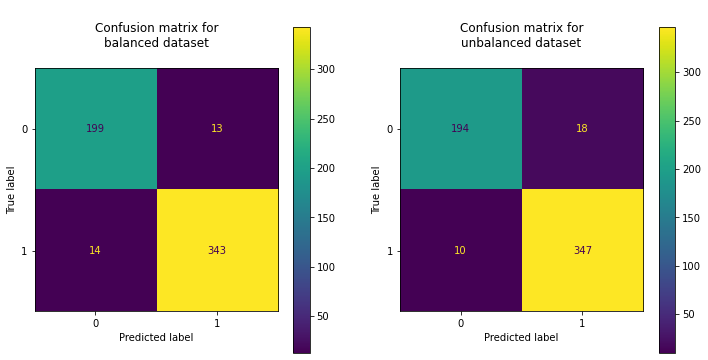

In [147]:
#Displaying the confusion matrixes side by side

import matplotlib.pyplot as plt

disp1 = ConfusionMatrixDisplay(confusion_matrix_balanced)

disp2 = ConfusionMatrixDisplay(confusion_matrix_unbalanced)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

disp1.plot(ax=ax1)
disp2.plot(ax=ax2)

ax1.set_title('\nConfusion matrix for\nbalanced dataset\n')
ax2.set_title('\nConfusion matrix for\nunbalanced dataset\n')

plt.show()

In [149]:
from sklearn.metrics import precision_score

prec_score_unb = round(precision_score(y_cancer, y_pred_unbalanced),4)
prec_score_bal = round(precision_score(y_cancer, y_pred_balanced),4)

print("""\nPrecision Score Unbalanced: {0}
Precision Score Balanced: {1}
""".format(prec_score_unb, prec_score_bal))


Precision Score Unbalanced: 0.9507
Precision Score Balanced: 0.9635



#### Findings:

When using an unbalanced dataset to train a model, there is the risk that the model is not as good labeling a class as it is the other. The takeaways of the confusion matrixes displayed, are that balancing the dataset allows for a better performance in terms of the worst-case scenario - predicting a benign tumour when it is malignant (top right corner of the matrixes), once that number decreased when balancing the datasets. The precision score, relevant for this case once it gives the ability of not labeling as positive a sample that is negative, is also higher for the balanced dataset.